In [1]:
#Загружаем библиотечки

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
#Функция для построения графика

def Plot_Scatter(y_test, y_predict, model_name = 'Model'):
    fig = plt.figure()
    fig.suptitle(model_name)
    plt.xlabel('y_test')
    plt.ylabel('y_predict')
    plt.scatter(y_test,y_predict)
    plt.show()

In [3]:
#Читаем файл

df = pd.read_csv('Erdeni_Houses_train.csv')

In [4]:
#Делим датасет на X и y и делим каждый на train и test

X = df.drop(['Price', 'Address'],axis=1).values
y = df['Price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

#Линейная регрессия для файла train


In [5]:
#Применяем линейную регрессию

linmodel = LinearRegression().fit(X_train, y_train)

y_pred = linmodel.predict(X_test)

r2: 0.92
MAE:  80601.84197254718
RMSE:  100957.93273900206


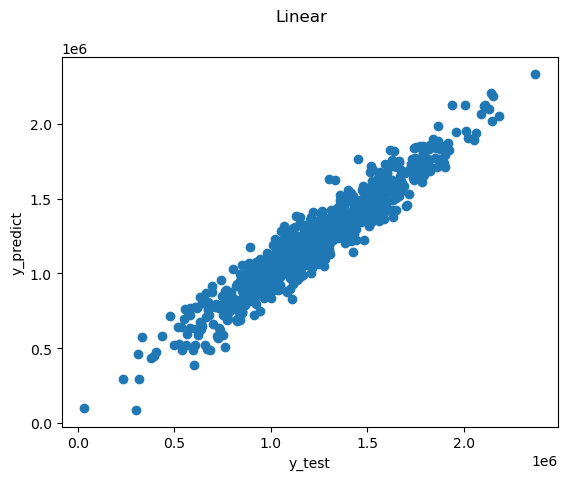

In [6]:
#Выводим метрики

print("r2:", round(r2_score(y_test, y_pred), 2))
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("RMSE: ", mean_squared_error(y_test, y_pred, squared=False))
Plot_Scatter(y_test, y_pred, "Linear")

# Валидация (Эрдэни)

#Линейная регрессия для файла test

In [7]:
#Читаем файл

df = pd.read_csv('Erdeni_Houses_test.csv')

In [8]:
#Делим датасет на X и y и делим каждый на train и test

X_test1 = df.drop(['Address'],axis=1).values


In [9]:
#Предиктим на тестовом файле

y_pred1 = linmodel.predict(X_test1)

y_pred1

array([1307291.8567469 , 1234995.80544927, 1244332.61257666,
       1228279.14821056, 1065825.24826869, 1545674.11401245,
       1091579.84165211,  832119.91925097,  785421.00569529,
       1471488.54652813,  671003.90122123, 1607046.54904925,
       1000902.35085947, 1794815.65306949, 1287781.98032531,
       1085346.43733788, 1421059.98592565, 1078557.86378746,
        801980.10853186,  931630.35223469, 1134984.92091929,
        916053.4923508 , 1491863.21789099, 1284432.02747592,
       1583026.68832464, 1130765.50174972, 1086755.70555207,
        973910.45385303,  925225.06221275, 1740174.25058358,
       1287900.21049968, 1622858.41712136, 1432643.4044959 ,
       1232865.94255218, 1486828.80435433, 1720188.17789344,
       1539714.02264784,  772337.96195257, 1766309.40344929,
       1176588.52158427, 1557353.53249126,  895714.45600062,
       1368358.54924086,  844100.94565969, 1199505.38715178,
       1131356.04944821, 1361231.39054015, 1448303.53917397,
       1572980.58722937,

In [10]:
df_true = pd.read_csv('Erdeni_Houses_y_true.csv')
df_true

,Unnamed: 0,Price
0,0,1.339096e+06
1,1,1.251794e+06
2,2,1.340095e+06
3,3,1.431508e+06
4,4,1.042374e+06
...,...,...
995,995,1.107031e+06
996,996,1.405505e+06
997,997,1.924156e+06
998,998,1.571254e+06


In [11]:
y_true = df_true['Price'].values
y_true

array([1339096.07724513, 1251794.17883686, 1340094.96620542,
       1431507.62342797, 1042373.52409608, 1555320.50000112,
       1250882.29175707, 1039380.72247961,  832475.18901532,
       1420648.28086982,  613788.32198953, 1702406.03893521,
        913587.0974474 , 1675557.27123079, 1279160.98758547,
        949684.41018076, 1372994.2901085 , 1148563.90358149,
        846939.42878425, 1002192.58207068, 1072253.83365512,
        973197.77534757, 1538985.18909838, 1135079.34529202,
       1618721.13842984, 1158742.82993929, 1268421.10418911,
        985749.78735653,  709348.22373391, 1869313.10698773,
       1476277.52737422, 1638265.39452366, 1431406.51296822,
       1253609.76404087, 1499356.11997188, 1798232.8027843 ,
       1506651.15657352,  680982.7688222 , 1745516.17062634,
       1288069.22644892, 1524106.96472147,  940229.23433028,
       1577017.76000155,  858685.56592496, 1161995.72817709,
       1285312.24421709, 1446597.12205741, 1434323.82515667,
       1537897.11811872,

r2: 0.92
MAE:  80971.26553204343
RMSE:  100542.60776381788


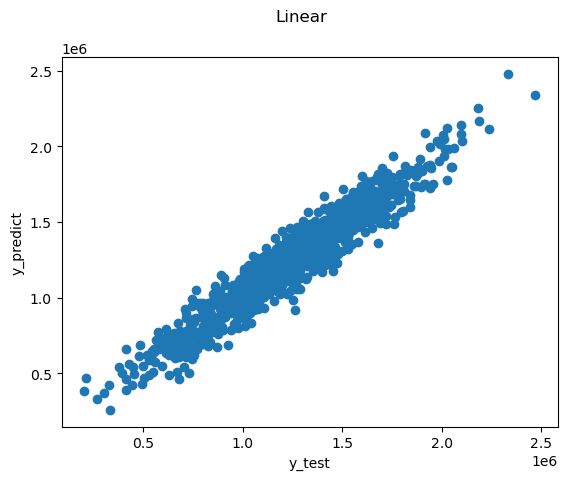

In [12]:
#Выводим метрики

print("r2:", round(r2_score(y_true, y_pred1), 2))
print("MAE: ", mean_absolute_error(y_true, y_pred1))
print("RMSE: ", mean_squared_error(y_true, y_pred1, squared=False))
Plot_Scatter(y_true, y_pred1, "Linear")